# Telecom Customer Churn

In [59]:
# imports and formatting

import pandas as pd
import numpy as np
import operator

from sklearn import svm, ensemble, linear_model, neighbors, naive_bayes, neural_network

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE, ADASYN

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True)

## Getting, Cleaning, and Standardizing the Data

In [62]:
df = pd.read_csv('cell2cell-duke univeristy.csv')

df = df.drop('churndep', axis = 1)
df = df.dropna()

In [330]:
df.shape

(69309, 73)

In [108]:
X = df.drop(['Unnamed: 0', 'X', 'customer', 'traintest', 'churn'], axis =1)
y = df.churn

In [64]:
X_tr, X_te, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=51, stratify = df.churn)

In [65]:
std = StandardScaler()
std.fit(X_tr.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [66]:
X_train = std.transform(X_tr.values)

X_test = std.transform(X_te.values)

## Imbalanced Classes

In [10]:
sm = SMOTE(random_state=42, ratio=1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [67]:
X_ada, y_ada = ADASYN(random_state = 42).fit_sample(X_train, y_train)

## A Few Models w/SMOTE

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
neighbors_model = knn.fit(X_train_res, y_train_res)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train_res, y_train_res)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, y_test)))

print("KNN confusion matrix: \n\n", confusion_matrix(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

The score for kNN is
Training:  79.34%
Test set:  51.39%
KNN confusion matrix: 

 [[4872 4993]
 [1745 2252]]
              precision    recall  f1-score   support

           0       0.74      0.49      0.59      9865
           1       0.31      0.56      0.40      3997

   micro avg       0.51      0.51      0.51     13862
   macro avg       0.52      0.53      0.50     13862
weighted avg       0.61      0.51      0.54     13862



In [12]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train_res, y_train_res)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train_res, y_train_res)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, y_test)))

print("Logistic Regression confusion matrix: \n\n", confusion_matrix(y_test, logit.predict(X_test)))


print(classification_report(y_test, logit.predict(X_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for logistic regression is
Training:  59.24%
Test set:  56.98%
Logistic Regression confusion matrix: 

 [[5487 4378]
 [1586 2411]]
              precision    recall  f1-score   support

           0       0.78      0.56      0.65      9865
           1       0.36      0.60      0.45      3997

   micro avg       0.57      0.57      0.57     13862
   macro avg       0.57      0.58      0.55     13862
weighted avg       0.65      0.57      0.59     13862



In [33]:
from sklearn.metrics import log_loss
log_loss(y_test, logit.predict(X_test))

14.86024838095489

In [13]:
clf = XGBClassifier()
xg = clf.fit(X_train_res, y_train_res)
print("The score for XGBoost is")
print("Training: {:6.2f}%".format(100*clf.score(X_train_res, y_train_res)))
print("Test set: {:6.2f}%".format(100*clf.score(X_test, y_test)))

print("XBGC matrix: \n\n", confusion_matrix(y_test, clf.predict(X_test)))

print(classification_report(y_test, clf.predict(X_test)))

The score for XGBoost is
Training:  78.02%
Test set:  69.17%
XBGC matrix: 

 [[8710 1155]
 [3118  879]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.80      9865
           1       0.43      0.22      0.29      3997

   micro avg       0.69      0.69      0.69     13862
   macro avg       0.58      0.55      0.55     13862
weighted avg       0.65      0.69      0.66     13862



In [14]:
rf = ensemble.RandomForestClassifier(n_estimators=100)
forest = rf.fit(X_train_res, y_train_res)
print("The score for Random Forest is")
print("Training: {:6.2f}%".format(100*rf.score(X_train_res, y_train_res)))
print("Test set: {:6.2f}%".format(100*rf.score(X_test, y_test)))

print("Random Forest confusion matrix: \n\n", confusion_matrix(y_test, rf.predict(X_test)))

print(classification_report(y_test, rf.predict(X_test)))

The score for Random Forest is
Training: 100.00%
Test set:  69.15%
Random Forest confusion matrix: 

 [[8723 1142]
 [3134  863]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.80      9865
           1       0.43      0.22      0.29      3997

   micro avg       0.69      0.69      0.69     13862
   macro avg       0.58      0.55      0.55     13862
weighted avg       0.65      0.69      0.65     13862



In [15]:
classifiers = [LogisticRegression(C = 0.95), KNeighborsClassifier(n_neighbors=6), naive_bayes.GaussianNB(),
               ensemble.RandomForestClassifier(n_estimators=100), neural_network.MLPClassifier(), XGBClassifier()]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

for cls in classifiers:
    model = cls.fit(X_train_res, y_train_res)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
result_table.set_index('classifiers', inplace=True)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

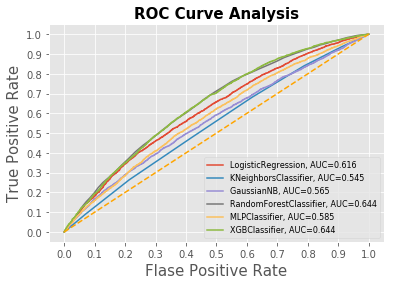

In [53]:

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':8}, loc='lower right')

plt.show()

## Feature Importances

In [18]:
feature_importances = []
for feature in zip(X.columns, rf.feature_importances_):
    feature_importances.append(feature)
    
feature_importance_df = pd.DataFrame(feature_importances, columns = ['Features', 'Importance'])

In [19]:
feature_importance = feature_importance_df.sort_values(['Importance'], ascending = False)

In [20]:
feature_importance.reset_index()

,index,Features,Importance
0,21,months,0.056912
1,26,eqpdays,0.053342
2,6,changem,0.038387
3,1,mou,0.038312
4,3,directas,0.037868
5,2,recchrge,0.037057
6,0,revenue,0.034463
7,7,changer,0.033972
8,16,peakvce,0.032044
9,4,overage,0.031715


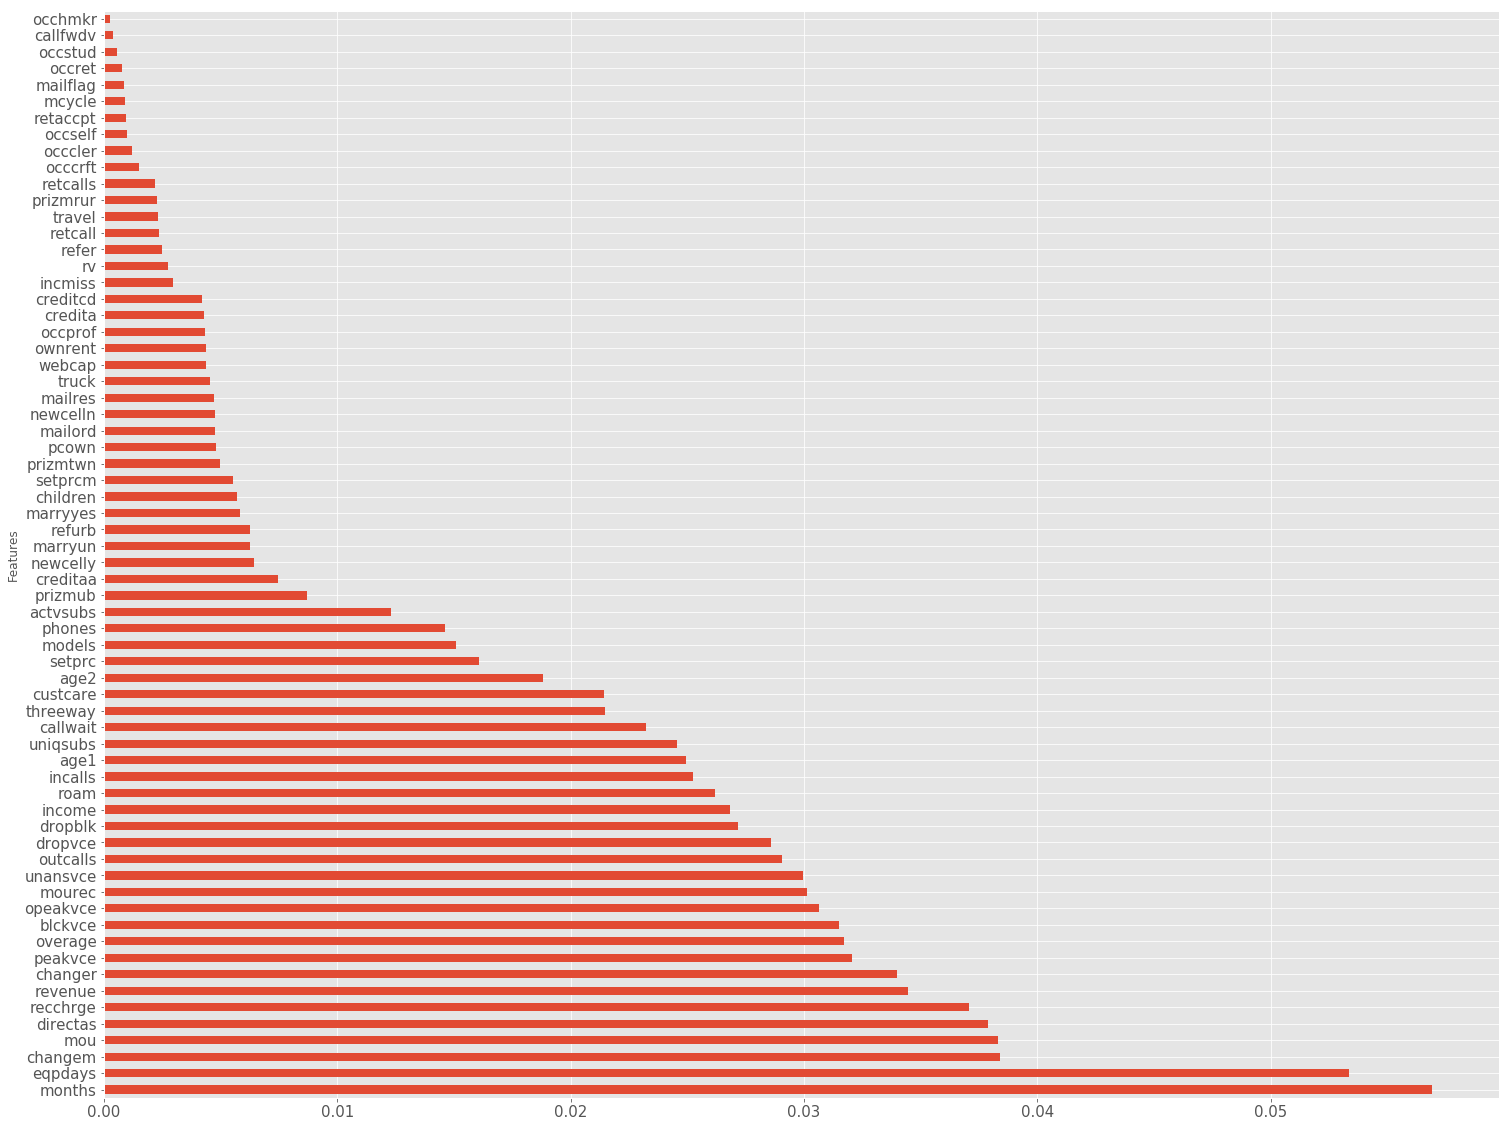

In [44]:
feature_importance.plot.barh(x = "Features", figsize=(25,20), fontsize=15, legend=False);

In [25]:
coefs = [coef for coef in logit.coef_.tolist()[0]]

In [54]:
features = list(X.columns.values)

coef_df = pd.DataFrame(coefs, columns=['Coefs']).reset_index()
coef_df['Features'] = features
coef_df.sort_values(by=['Coefs'], ascending=True, inplace=True)
#coef_df = coef_df.loc[coef_df['Coefs'].abs() > 0.05, :]
coef_df.reset_index(drop=True, inplace=True)

In [55]:
coef_df

,index,Coefs,Features
0,21,-0.252490,months
1,1,-0.183467,mou
2,31,-0.162560,creditaa
3,6,-0.155034,changem
4,23,-0.132747,actvsubs
5,27,-0.125645,age1
6,18,-0.093901,dropblk
7,50,-0.088608,mailres
8,16,-0.081472,peakvce
9,30,-0.081244,credita


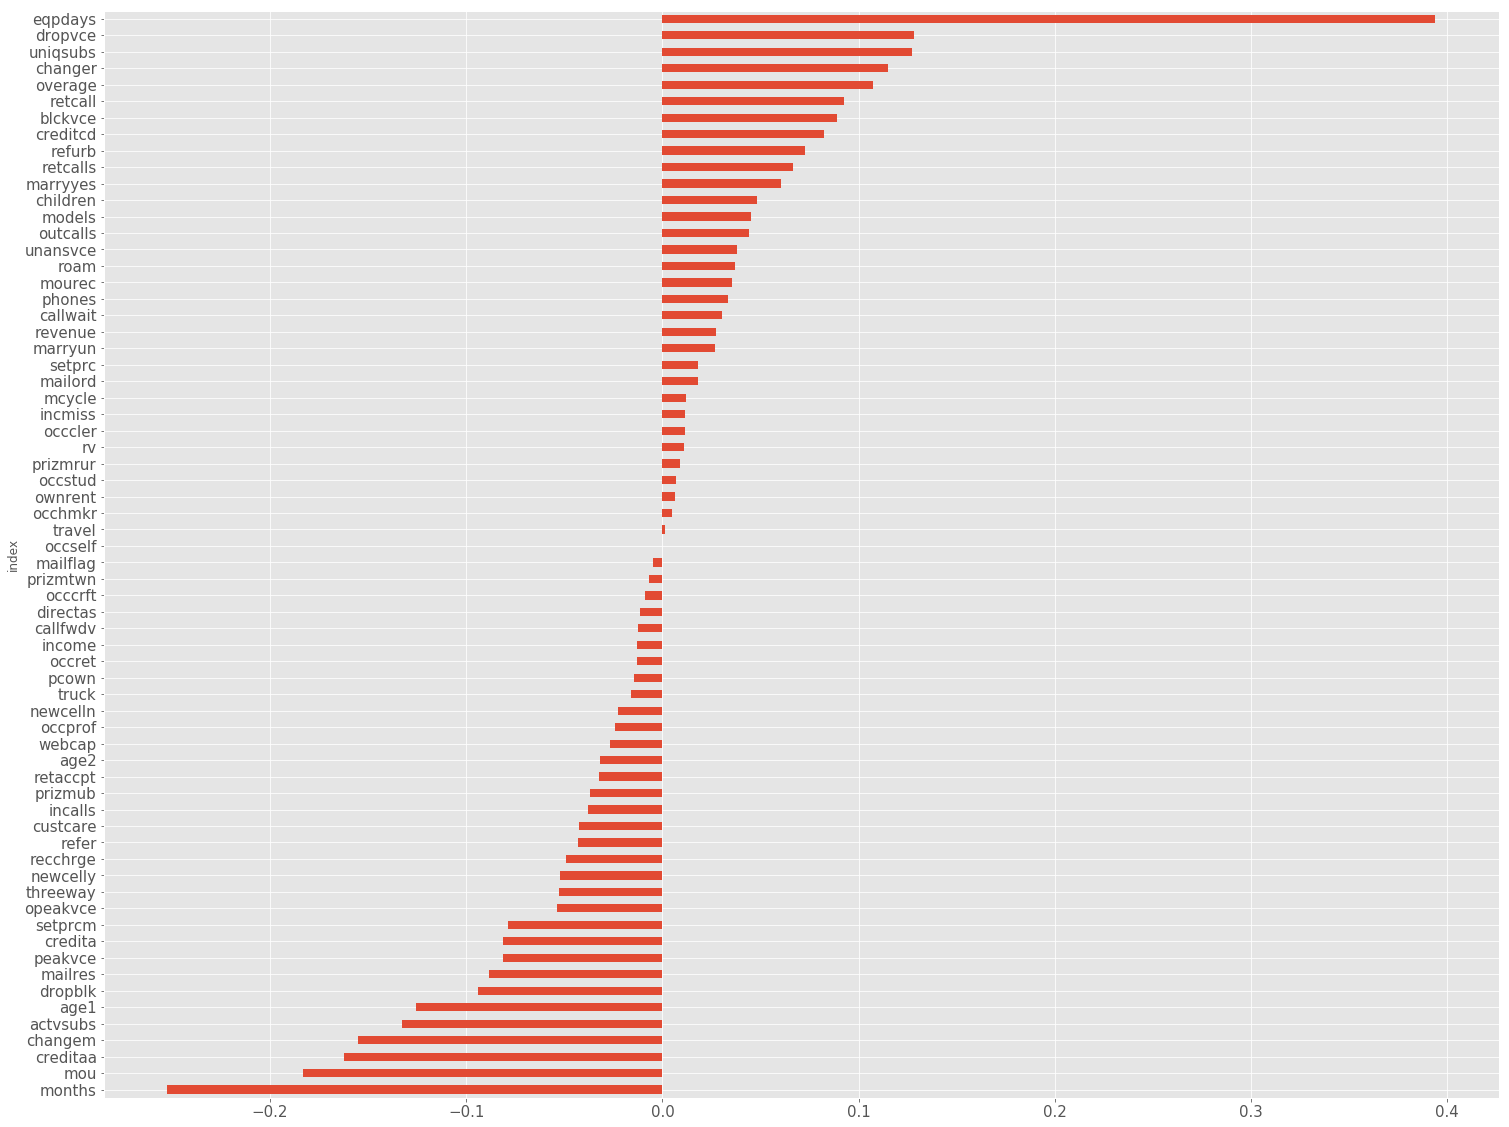

In [37]:
coef_df.plot.barh(x='index', figsize=(25,20), fontsize=15, legend=False);

In [56]:
features_df = pd.merge(coef_df, feature_importance, on = 'Features', how = 'outer')

In [57]:
features_df

,index,Coefs,Features,Importance
0,21,-0.252490,months,0.056912
1,1,-0.183467,mou,0.038312
2,31,-0.162560,creditaa,0.007454
3,6,-0.155034,changem,0.038387
4,23,-0.132747,actvsubs,0.012316
5,27,-0.125645,age1,0.024942
6,18,-0.093901,dropblk,0.027175
7,50,-0.088608,mailres,0.004710
8,16,-0.081472,peakvce,0.032044
9,30,-0.081244,credita,0.004278


In [80]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_ada, y_ada)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_ada, y_ada)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, y_test)))

print("Logistic Regression confusion matrix: \n\n", confusion_matrix(y_test, logit.predict(X_test)))


print(classification_report(y_test, logit.predict(X_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for logistic regression is
Training:  58.60%
Test set:  56.06%
Logistic Regression confusion matrix: 

 [[5289 4576]
 [1515 2482]]
              precision    recall  f1-score   support

           0       0.78      0.54      0.63      9865
           1       0.35      0.62      0.45      3997

   micro avg       0.56      0.56      0.56     13862
   macro avg       0.56      0.58      0.54     13862
weighted avg       0.65      0.56      0.58     13862



In [70]:
clf = XGBClassifier()
clf.fit(X_ada, y_ada)
print("The score for XGBoost is")
print("Training: {:6.2f}%".format(100*clf.score(X_ada, y_ada)))
print("Test set: {:6.2f}%".format(100*clf.score(X_test, y_test)))

print("XBGC matrix: \n\n", confusion_matrix(y_test, clf.predict(X_test)))

print(classification_report(y_test, clf.predict(X_test)))

The score for XGBoost is
Training:  78.36%
Test set:  69.60%
XBGC matrix: 

 [[8860 1005]
 [3209  788]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.81      9865
           1       0.44      0.20      0.27      3997

   micro avg       0.70      0.70      0.70     13862
   macro avg       0.59      0.55      0.54     13862
weighted avg       0.65      0.70      0.65     13862



In [71]:
rf = ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(X_ada, y_ada)
print("The score for Random Forest is")
print("Training: {:6.2f}%".format(100*rf.score(X_ada, y_ada)))
print("Test set: {:6.2f}%".format(100*rf.score(X_test, y_test)))

print("Random Forest confusion matrix: \n\n", confusion_matrix(y_test, rf.predict(X_test)))

print(classification_report(y_test, rf.predict(X_test)))

The score for Random Forest is
Training: 100.00%
Test set:  69.51%
Random Forest confusion matrix: 

 [[8788 1077]
 [3149  848]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      9865
           1       0.44      0.21      0.29      3997

   micro avg       0.70      0.70      0.70     13862
   macro avg       0.59      0.55      0.55     13862
weighted avg       0.65      0.70      0.66     13862



In [79]:
logit = LogisticRegression(C = 1000)
logit.fit(X_ada, y_ada)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_ada, y_ada)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, y_test)))

print("Logistic Regression confusion matrix: \n\n", confusion_matrix(y_test, logit.predict(X_test)))


print(classification_report(y_test, logit.predict(X_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for logistic regression is
Training:  58.59%
Test set:  56.06%
Logistic Regression confusion matrix: 

 [[5289 4576]
 [1515 2482]]
              precision    recall  f1-score   support

           0       0.78      0.54      0.63      9865
           1       0.35      0.62      0.45      3997

   micro avg       0.56      0.56      0.56     13862
   macro avg       0.56      0.58      0.54     13862
weighted avg       0.65      0.56      0.58     13862



In [73]:
logit = LogisticRegression(C = 0.75)
logit.fit(X_ada, y_ada)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_ada, y_ada)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, y_test)))

print("Logistic Regression confusion matrix: \n\n", confusion_matrix(y_test, logit.predict(X_test)))


print(classification_report(y_test, logit.predict(X_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for logistic regression is
Training:  58.59%
Test set:  56.06%
Logistic Regression confusion matrix: 

 [[5289 4576]
 [1515 2482]]
              precision    recall  f1-score   support

           0       0.78      0.54      0.63      9865
           1       0.35      0.62      0.45      3997

   micro avg       0.56      0.56      0.56     13862
   macro avg       0.56      0.58      0.54     13862
weighted avg       0.65      0.56      0.58     13862



In [88]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['retain', 'churn'],
           yticklabels=['retain', 'churn']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

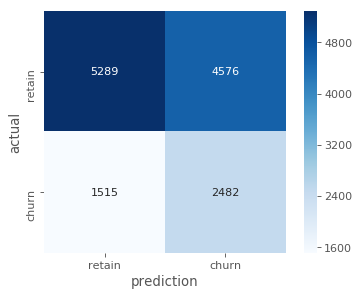

In [89]:
make_confusion_matrix(logit, threshold = 0.5)

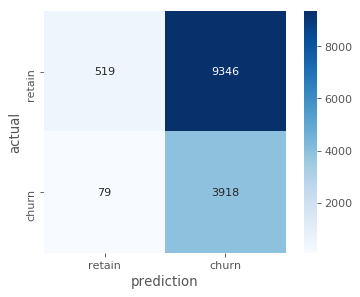

In [90]:
make_confusion_matrix(logit, threshold = 0.3)

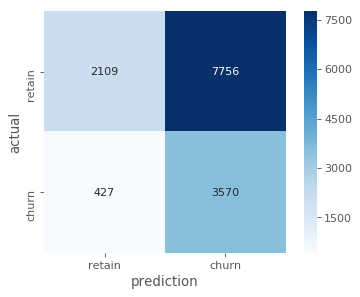

In [91]:
make_confusion_matrix(logit, threshold = 0.4)

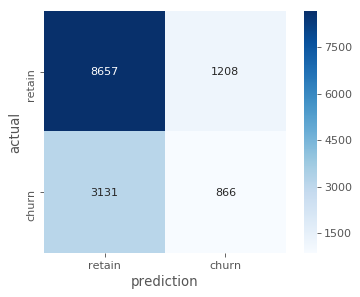

In [92]:
make_confusion_matrix(logit, threshold = 0.6)

(array([22856., 16470., 10532.,  6624.,  4406.,  2787.,  1883.,  1277.,
          841.,   554.,   342.,   236.,   159.,   122.,    74.,    43.,
           30.,    19.,    13.,    11.,     6.,     7.,     4.,     1.,
            3.,     1.,     3.,     2.,     1.,     0.,     0.,     0.,
            0.,     1.,     1.]),
 array([   0.        ,  219.07857143,  438.15714286,  657.23571429,
         876.31428571, 1095.39285714, 1314.47142857, 1533.55      ,
        1752.62857143, 1971.70714286, 2190.78571429, 2409.86428571,
        2628.94285714, 2848.02142857, 3067.1       , 3286.17857143,
        3505.25714286, 3724.33571429, 3943.41428571, 4162.49285714,
        4381.57142857, 4600.65      , 4819.72857143, 5038.80714286,
        5257.88571429, 5476.96428571, 5696.04285714, 5915.12142857,
        6134.2       , 6353.27857143, 6572.35714286, 6791.43571429,
        7010.51428571, 7229.59285714, 7448.67142857, 7667.75      ]),
 <a list of 35 Patch objects>)

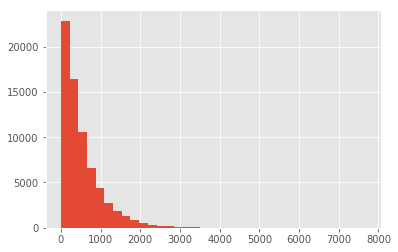

In [94]:
plt.hist(x = df.mou, bins =35)

In [97]:
df['log_mou'] = np.log(df.mou.apply(lambda x : x + 0.001))

(array([  822.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,    69.,    57.,    49.,    88.,
          123.,   193.,   264.,   446.,   558.,   866.,  1308.,  2005.,
         2948.,  4796.,  6943.,  9931., 11708., 11179.,  8672.,  4648.,
         1424.,   196.,    16.]),
 array([-6.90775528, -6.45482574, -6.0018962 , -5.54896666, -5.09603712,
        -4.64310758, -4.19017804, -3.7372485 , -3.28431896, -2.83138942,
        -2.37845988, -1.92553034, -1.4726008 , -1.01967126, -0.56674171,
        -0.11381217,  0.33911737,  0.79204691,  1.24497645,  1.69790599,
         2.15083553,  2.60376507,  3.05669461,  3.50962415,  3.96255369,
         4.41548323,  4.86841277,  5.32134231,  5.77427185,  6.22720139,
         6.68013093,  7.13306047,  7.58599001,  8.03891955,  8.49184909,
         8.94477863]),
 <a list of 35 Patch objects>)

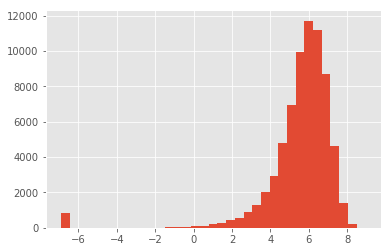

In [98]:
plt.hist(x = df.log_mou, bins = 35)

In [99]:
df['sq_custcare'] = df.custcare.apply(lambda x : x**2)

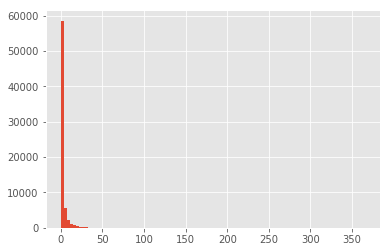

In [106]:
plt.hist(x = df.custcare, bins = 100);

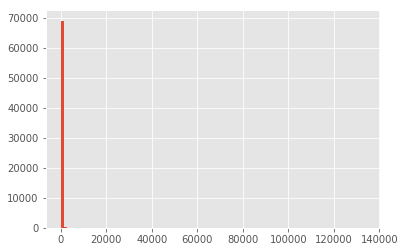

In [105]:
plt.hist(x = df.sq_custcare, bins = 100);

In [292]:
X2 = df.drop(['Unnamed: 0', 'X', 'customer', 'traintest', 'churn', 'custcare', 'mou'], axis =1)
y2 = df.churn

In [293]:
X_tr2, X_te2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.2, random_state=51, stratify = y2)

In [294]:
std = StandardScaler()
std.fit(X_tr2.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [295]:
X_train2 = std.transform(X_tr2.values)

X_test2 = std.transform(X_te2.values)

In [116]:
logit = LogisticRegression(C = 1000)
logit.fit(X_train2, y_train2)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train2, y_train2)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test2, y_test2)))

print("Logistic Regression confusion matrix: \n\n", confusion_matrix(y_test2, logit.predict(X_test2)))


print(classification_report(y_test2, logit.predict(X_test2)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for logistic regression is
Training:  71.48%
Test set:  71.01%
Logistic Regression confusion matrix: 

 [[9680  185]
 [3834  163]]
              precision    recall  f1-score   support

           0       0.72      0.98      0.83      9865
           1       0.47      0.04      0.08      3997

   micro avg       0.71      0.71      0.71     13862
   macro avg       0.59      0.51      0.45     13862
weighted avg       0.64      0.71      0.61     13862



In [117]:
#train_x = train_df.values
#test_x = test_df.values


clf = XGBClassifier()
clf.fit(X_train2, y_train2)
print("The score for XGBoost is")
print("Training: {:6.2f}%".format(100*clf.score(X_train2, y_train2)))
print("Test set: {:6.2f}%".format(100*clf.score(X_test2, y_test2)))

print("XBGC matrix: \n\n", confusion_matrix(y_test2, clf.predict(X_test2)))

print(classification_report(y_test2, clf.predict(X_test2)))

The score for XGBoost is
Training:  72.14%
Test set:  71.92%
XBGC matrix: 

 [[9742  123]
 [3769  228]]
              precision    recall  f1-score   support

           0       0.72      0.99      0.83      9865
           1       0.65      0.06      0.10      3997

   micro avg       0.72      0.72      0.72     13862
   macro avg       0.69      0.52      0.47     13862
weighted avg       0.70      0.72      0.62     13862



In [119]:
rf = ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(X_train2, y_train2)
print("The score for Random Forest is")
print("Training: {:6.2f}%".format(100*rf.score(X_train2, y_train2)))
print("Test set: {:6.2f}%".format(100*rf.score(X_test2, y_test2)))

print("Random Forest confusion matrix: \n\n", confusion_matrix(y_test2, rf.predict(X_test2)))

print(classification_report(y_test2, rf.predict(X_test2)))

The score for Random Forest is
Training: 100.00%
Test set:  71.71%
Random Forest confusion matrix: 

 [[9640  225]
 [3696  301]]
              precision    recall  f1-score   support

           0       0.72      0.98      0.83      9865
           1       0.57      0.08      0.13      3997

   micro avg       0.72      0.72      0.72     13862
   macro avg       0.65      0.53      0.48     13862
weighted avg       0.68      0.72      0.63     13862



In [120]:
X_ada2, y_ada2 = ADASYN(random_state = 42).fit_sample(X_train2, y_train2)

In [163]:
logit = LogisticRegression(C = 1000)
logit.fit(X_ada2, y_ada2)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_ada2, y_ada2)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test2, y_test2)))

print("Logistic Regression confusion matrix: \n\n", confusion_matrix(y_test2, logit.predict(X_test2)))


print(classification_report(y_test2, logit.predict(X_test2)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for logistic regression is
Training:  58.48%
Test set:  56.68%
Logistic Regression confusion matrix: 

 [[5392 4473]
 [1532 2465]]
              precision    recall  f1-score   support

           0       0.78      0.55      0.64      9865
           1       0.36      0.62      0.45      3997

   micro avg       0.57      0.57      0.57     13862
   macro avg       0.57      0.58      0.55     13862
weighted avg       0.66      0.57      0.59     13862



In [122]:
rf = ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(X_ada2, y_ada2)
print("The score for Random Forest is")
print("Training: {:6.2f}%".format(100*rf.score(X_ada2, y_ada2)))
print("Test set: {:6.2f}%".format(100*rf.score(X_test2, y_test2)))

print("Random Forest confusion matrix: \n\n", confusion_matrix(y_test2, rf.predict(X_test2)))

print(classification_report(y_test2, rf.predict(X_test2)))

The score for Random Forest is
Training: 100.00%
Test set:  69.55%
Random Forest confusion matrix: 

 [[8773 1092]
 [3129  868]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      9865
           1       0.44      0.22      0.29      3997

   micro avg       0.70      0.70      0.70     13862
   macro avg       0.59      0.55      0.55     13862
weighted avg       0.65      0.70      0.66     13862



In [211]:
best_XGB = XGBClassifier()
best_XGB.fit(X_ada2, y_ada2)
print("The score for XGBoost is")
print("Training: {:6.2f}%".format(100*clf.score(X_ada2, y_ada2)))
print("Test set: {:6.2f}%".format(100*clf.score(X_test2, y_test2)))

print("XBGC matrix: \n\n", confusion_matrix(y_test2, clf.predict(X_test2)))

print(classification_report(y_test2, clf.predict(X_test2)))

The score for XGBoost is
Training:  79.67%
Test set:  70.89%
XBGC matrix: 

 [[9206  659]
 [3376  621]]
              precision    recall  f1-score   support

           0       0.73      0.93      0.82      9865
           1       0.49      0.16      0.24      3997

   micro avg       0.71      0.71      0.71     13862
   macro avg       0.61      0.54      0.53     13862
weighted avg       0.66      0.71      0.65     13862



In [124]:
X_smote2, y_smote2 = SMOTE(random_state = 42).fit_sample(X_train2, y_train2)

In [125]:
clf = XGBClassifier()
clf.fit(X_smote2, y_smote2)
print("The score for XGBoost is")
print("Training: {:6.2f}%".format(100*clf.score(X_smote2, y_smote2)))
print("Test set: {:6.2f}%".format(100*clf.score(X_test2, y_test2)))

print("XBGC matrix: \n\n", confusion_matrix(y_test2, clf.predict(X_test2)))

print(classification_report(y_test2, clf.predict(X_test2)))

The score for XGBoost is
Training:  78.39%
Test set:  69.91%
XBGC matrix: 

 [[8896  969]
 [3202  795]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      9865
           1       0.45      0.20      0.28      3997

   micro avg       0.70      0.70      0.70     13862
   macro avg       0.59      0.55      0.54     13862
weighted avg       0.65      0.70      0.66     13862



In [126]:
rf = ensemble.RandomForestClassifier(n_estimators=1000)
rf.fit(X_ada2, y_ada2)
print("The score for Random Forest is")
print("Training: {:6.2f}%".format(100*rf.score(X_ada2, y_ada2)))
print("Test set: {:6.2f}%".format(100*rf.score(X_test2, y_test2)))

print("Random Forest confusion matrix: \n\n", confusion_matrix(y_test2, rf.predict(X_test2)))

print(classification_report(y_test2, rf.predict(X_test2)))

The score for Random Forest is
Training: 100.00%
Test set:  70.10%
Random Forest confusion matrix: 

 [[8897  968]
 [3177  820]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      9865
           1       0.46      0.21      0.28      3997

   micro avg       0.70      0.70      0.70     13862
   macro avg       0.60      0.55      0.55     13862
weighted avg       0.66      0.70      0.66     13862



In [127]:
clf = XGBClassifier(max_depth = 4)
clf.fit(X_smote2, y_smote2)
print("The score for XGBoost is")
print("Training: {:6.2f}%".format(100*clf.score(X_smote2, y_smote2)))
print("Test set: {:6.2f}%".format(100*clf.score(X_test2, y_test2)))

print("XBGC matrix: \n\n", confusion_matrix(y_test2, clf.predict(X_test2)))

print(classification_report(y_test2, clf.predict(X_test2)))

The score for XGBoost is
Training:  79.75%
Test set:  70.89%
XBGC matrix: 

 [[9206  659]
 [3376  621]]
              precision    recall  f1-score   support

           0       0.73      0.93      0.82      9865
           1       0.49      0.16      0.24      3997

   micro avg       0.71      0.71      0.71     13862
   macro avg       0.61      0.54      0.53     13862
weighted avg       0.66      0.71      0.65     13862



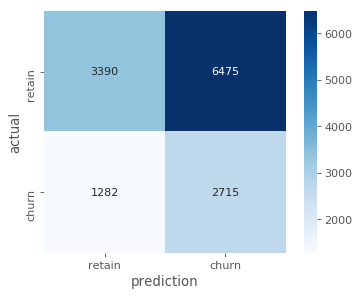

In [141]:
make_confusion_matrix(rf, threshold = .75)

In [148]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [150]:
from collections import defaultdict
cv_results = defaultdict(list)

In [151]:
X_trainCV = np.array(X_train2)
y_trainCV = np.array(y_train2)

In [152]:
models = {'xgboost': XGBClassifier(), 'Logistic Regression': LogisticRegression(),
         'Random Forest': ensemble.RandomForestClassifier()}

In [154]:
for model_name, model in models.items():
    for train_ind, val_ind in kf.split(X_trainCV, y_trainCV):
        X_tr, y_tr = X_trainCV[train_ind], y_trainCV[train_ind]
        X_ADA_train, y_ADA_train = ADASYN(random_state = 42).fit_sample(X_tr, y_tr)
        X_val, y_val = X_trainCV[val_ind], y_trainCV[val_ind]
        model.fit(X_ADA_train, y_ADA_train)
        y_predictCV = model.predict(X_val)
        precision = precision_score(y_val, y_predictCV)
        cv_results[model_name].append(precision)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [155]:
cv_results

defaultdict(list,
            {'xgboost': [0.45109931766489764,
              0.44269662921348313,
              0.45172180958811614,
              0.44622093023255816,
              0.4405594405594406],
             'Logistic Regression': [0.35514018691588783,
              0.3524967753823475,
              0.3584905660377358,
              0.35582479030754893,
              0.3595263724434876],
             'Random Forest': [0.3868801652892562,
              0.38503740648379053,
              0.38193343898573695,
              0.37317930688096435,
              0.38465322183964584]})

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


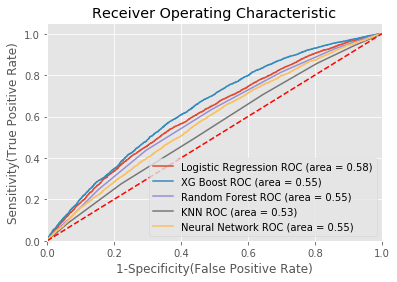

In [158]:

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
    {'label': 'Logistic Regression','model': LogisticRegression()},
    {'label': 'XG Boost','model': XGBClassifier()},
    {'label': 'Random Forest','model': ensemble.RandomForestClassifier()},
    {'label': 'KNN','model': KNeighborsClassifier(n_neighbors=6)},
    {'label': 'Neural Network','model': neural_network.MLPClassifier()}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_ada2, y_ada2) # train the model
    y_pred=model.predict(X_test2) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test2, model.predict_proba(X_test2)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test2,model.predict(X_test2))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show() 

In [164]:
logit = LogisticRegression(C = 1000)
logit.fit(X_ada2, y_ada2)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_ada2, y_ada2)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test2, y_test2)))

print("Logistic Regression confusion matrix: \n\n", confusion_matrix(y_test2, logit.predict(X_test2)))


print(classification_report(y_test2, logit.predict(X_test2)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for logistic regression is
Training:  58.48%
Test set:  56.68%
Logistic Regression confusion matrix: 

 [[5392 4473]
 [1532 2465]]
              precision    recall  f1-score   support

           0       0.78      0.55      0.64      9865
           1       0.36      0.62      0.45      3997

   micro avg       0.57      0.57      0.57     13862
   macro avg       0.57      0.58      0.55     13862
weighted avg       0.66      0.57      0.59     13862



In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)

In [168]:
grid = GridSearchCV(logit, hyperparameters, cv=5, verbose=0)

In [169]:
best_model = grid.fit(X_ada2, y_ada2)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [170]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 7.742636826811269


In [183]:
best_model.predict_proba(X_ada2)

array([[0.38523545, 0.61476455],
       [0.40382034, 0.59617966],
       [0.5913673 , 0.4086327 ],
       ...,
       [0.43476452, 0.56523548],
       [0.53025968, 0.46974032],
       [0.39791515, 0.60208485]])

In [184]:
print(classification_report(y_test2, best_model.predict(X_test2)))

              precision    recall  f1-score   support

           0       0.78      0.55      0.64      9865
           1       0.36      0.62      0.45      3997

   micro avg       0.57      0.57      0.57     13862
   macro avg       0.57      0.58      0.55     13862
weighted avg       0.66      0.57      0.59     13862



In [185]:
from sklearn.metrics import fbeta_score

In [191]:
def get_scores(clf, X_ada2, y_ada2, X_test2, y_test2):
    clf.fit(X_ada2, y_ada2)
    app = dict()
    score = fbeta_score(y_test2, clf.predict(X_test2), beta=.25, average=None)
    #avg_sample_score = fbeta_score(y_test, clf.predict(X_test2), beta=.25, average='samples')
    #prec_score = precision_score(y_test, clf.predict(X_test2), average='micro')
    #rec_score = recall_score(y_test, clf.predict(X_test2), average='micro')
    #avg_prec = average_precision_score(y_test2, clf.predict(X_test2))
    #metrics = [score, avg_sample_score, roc_auc_score(y_test2, clf.predict_proba(X_test2))]
    #app['Classwise Scores'] = ([(mlb.classes_[l], score[l]) for l in score.argsort()[::-1]])
    #app['F2 Score'] = avg_sample_score
    #app['ROC_AUC'] = roc_auc_score(y_test2, clf.predict_proba(X_test2))
    #app['P_AUPR'] = avg_prec
    #app['Precision'] = prec_score
    #app['Recall'] = rec_score
    return app 

In [193]:
fbeta_score(y_test2, best_model.predict(X_test2), beta = .25, average=None)

array([0.75967733, 0.3642741 ])

In [194]:
features_df

,index,Coefs,Features,Importance
0,21,-0.252490,months,0.056912
1,1,-0.183467,mou,0.038312
2,31,-0.162560,creditaa,0.007454
3,6,-0.155034,changem,0.038387
4,23,-0.132747,actvsubs,0.012316
5,27,-0.125645,age1,0.024942
6,18,-0.093901,dropblk,0.027175
7,50,-0.088608,mailres,0.004710
8,16,-0.081472,peakvce,0.032044
9,30,-0.081244,credita,0.004278


In [195]:
features_df.to_csv(r'features.csv')

In [199]:
from yellowbrick.classifier import DiscriminationThreshold
from sklearn.pipeline import make_pipeline

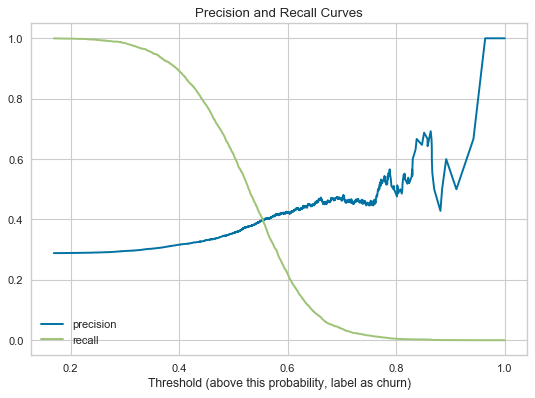

In [210]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test2, best_model.predict_proba(X_test2)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as churn)');
plt.title('Precision and Recall Curves');

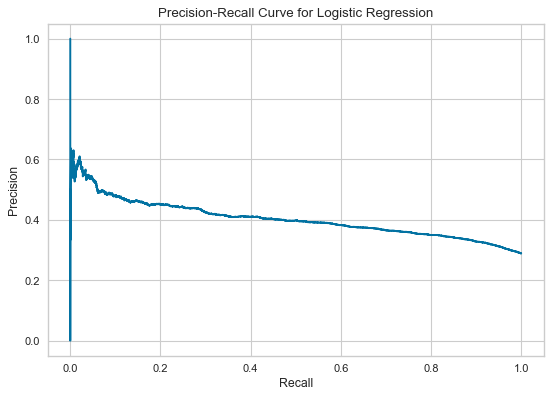

In [217]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Logistic Regression");

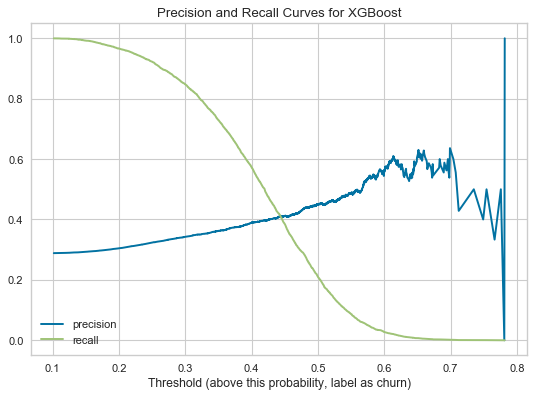

In [216]:
precision_curve2, recall_curve2, threshold_curve2 = precision_recall_curve(y_test2, best_XGB.predict_proba(X_test2)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as churn)');
plt.title('Precision and Recall Curves for XGBoost');

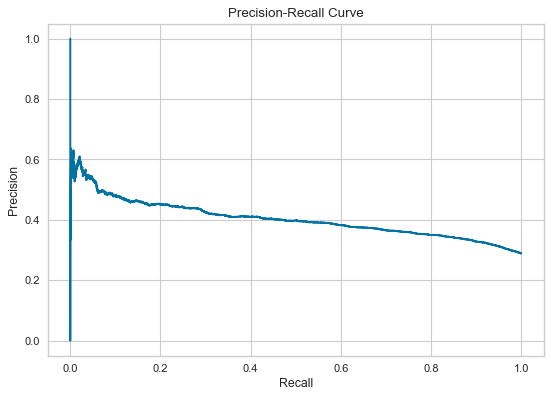

In [215]:
plt.figure(dpi=80)
plt.plot(recall_curve2[1:], precision_curve2[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [218]:
y_predict = best_model.predict(X_test2)
f1_score(y_test2, y_predict)

0.450763463472616

In [220]:
fbeta_score(y_test2, y_predict, beta = .25)

0.3642741031146501

In [222]:
y_predict2 = best_XGB.predict(X_test2)
fbeta_score(y_test2, y_predict2, beta = .25)

0.4217202329913367

In [223]:
f1_score(y_test2, y_predict2)

0.28629926633680264

In [224]:
best_XGB = XGBClassifier()
best_XGB.fit(X_ada2, y_ada2)
print("The score for XGBoost is")
print("Training: {:6.2f}%".format(100*clf.score(X_ada2, y_ada2)))
print("Test set: {:6.2f}%".format(100*clf.score(X_test2, y_test2)))

print("XBGC matrix: \n\n", confusion_matrix(y_test2, clf.predict(X_test2)))

print(classification_report(y_test2, clf.predict(X_test2)))

The score for XGBoost is
Training:  79.67%
Test set:  70.89%
XBGC matrix: 

 [[9206  659]
 [3376  621]]
              precision    recall  f1-score   support

           0       0.73      0.93      0.82      9865
           1       0.49      0.16      0.24      3997

   micro avg       0.71      0.71      0.71     13862
   macro avg       0.61      0.54      0.53     13862
weighted avg       0.66      0.71      0.65     13862



In [226]:
print(classification_report(y_test2, best_model.predict(X_test2)))

              precision    recall  f1-score   support

           0       0.78      0.55      0.64      9865
           1       0.36      0.62      0.45      3997

   micro avg       0.57      0.57      0.57     13862
   macro avg       0.57      0.58      0.55     13862
weighted avg       0.66      0.57      0.59     13862



In [236]:
threshold = .48
y_predict3 = (best_XGB.predict_proba(X_test2)[:, 1] >= threshold)
fbeta_score(y_test2, y_predict3, beta = .25)


0.4238978655495711

In [241]:
threshold = .45
y_predict4 = (best_model.predict_proba(X_test2)[:, 1] >= threshold)
fbeta_score(y_test2, y_predict4, beta = .25)


0.3431469842319992

In [255]:
clf = XGBClassifier()
parameters = {
    'n_estimators': [100, 250, 500],
    'max_depth': [6, 9, 12],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0]}

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="roc_auc",
                    cv=3)

grid.fit(X_train2, y_train2)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.675371 using {'colsample_bytree': 1.0, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}
0.673870 (0.002918) with: {'colsample_bytree': 0.9, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}
0.673763 (0.001126) with: {'colsample_bytree': 0.9, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}
0.671815 (0.002230) with: {'colsample_bytree': 0.9, 'max_depth': 6, 'n_estimators': 250, 'subsample': 0.9}
0.671508 (0.001876) with: {'colsample_bytree': 0.9, 'max_depth': 6, 'n_estimators': 250, 'subsample': 1.0}
0.665465 (0.002061) with: {'colsample_bytree': 0.9, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.9}
0.664166 (0.002108) with: {'colsample_bytree': 0.9, 'max_depth': 6, 'n_estimators': 500, 'subsample': 1.0}
0.666103 (0.001077) with: {'colsample_bytree': 0.9, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.9}
0.665683 (0.001958) with: {'colsample_bytree': 0.9, 'max_depth': 9, 'n_estimators': 100, 'subsample': 1.0}
0.658654 (0.000849) with: {'colsample_bytr

In [256]:
final_model = XGBClassifier(max_depth = 6, n_estimators = 100, subsample = 0.9)
final_model.fit(X_ada2, y_ada2)

print("The score for tuned XGBoost is")
print("Training: {:6.2f}%".format(100*final_model.score(X_ada2, y_ada2)))
print("Test set: {:6.2f}%".format(100*final_model.score(X_test2, y_test2)))

print("XBGC matrix: \n\n", confusion_matrix(y_test2, final_model.predict(X_test2)))

print(classification_report(y_test2, final_model.predict(X_test2)))

The score for tuned XGBoost is
Training:  81.60%
Test set:  71.79%
XBGC matrix: 

 [[9391  474]
 [3436  561]]
              precision    recall  f1-score   support

           0       0.73      0.95      0.83      9865
           1       0.54      0.14      0.22      3997

   micro avg       0.72      0.72      0.72     13862
   macro avg       0.64      0.55      0.53     13862
weighted avg       0.68      0.72      0.65     13862



In [257]:
threshold = .5
y_predict3 = (final_model.predict_proba(X_test2)[:, 1] >= threshold)
fbeta_score(y_test2, y_predict3, beta = .25)

0.46392956170647465

In [259]:
threshold = .45
y_predict3 = (final_model.predict_proba(X_test2)[:, 1] >= threshold)
fbeta_score(y_test2, y_predict3, beta = .25)

0.469367823676917

In [260]:
threshold = .42
y_predict3 = (final_model.predict_proba(X_test2)[:, 1] >= threshold)
fbeta_score(y_test2, y_predict3, beta = .25)

0.4568263277940697

In [261]:
threshold = .46
y_predict3 = (final_model.predict_proba(X_test2)[:, 1] >= threshold)
fbeta_score(y_test2, y_predict3, beta = .25)

0.4715897252730898

In [262]:
threshold = .47
y_predict3 = (final_model.predict_proba(X_test2)[:, 1] >= threshold)
fbeta_score(y_test2, y_predict3, beta = .25)

0.4704366739166806

In [263]:
#best threshold is .46

In [264]:
threshold = .46
y_predict3 = (final_model.predict_proba(X_test2)[:, 1] >= threshold)
fbeta_score(y_test2, y_predict3, beta = .25)

0.4715897252730898

In [265]:
recall_score(y_test2, y_predict3)

0.23317488116087065

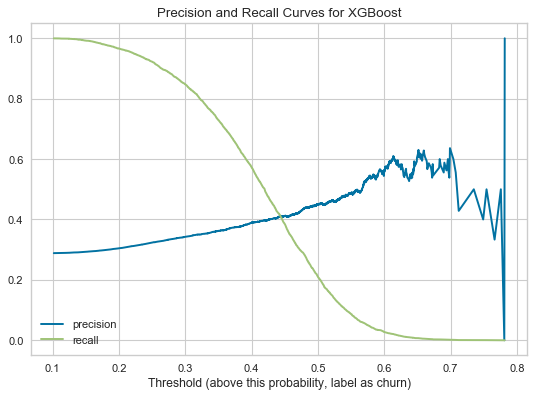

In [266]:
precision_curve2, recall_curve2, threshold_curve2 = precision_recall_curve(y_test2, final_model.predict_proba(X_test2)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as churn)');
plt.title('Precision and Recall Curves for XGBoost');

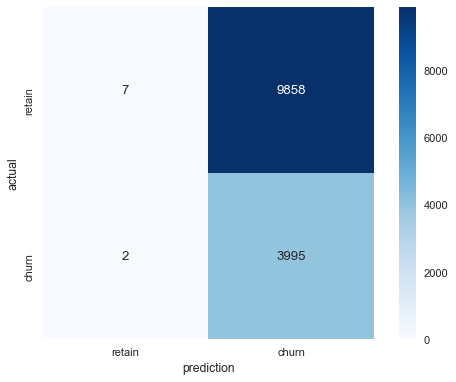

In [271]:
make_confusion_matrix(final_model, threshold = .9)

In [305]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test2)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test2, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['retain', 'churn'],
           yticklabels=['retain', 'churn']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    plt.title('Confusion Matrix for Churn Model')

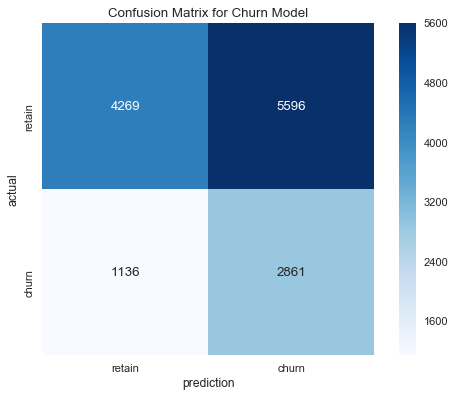

In [306]:
make_confusion_matrix(best_model, threshold = 0.47)

In [279]:
y_predict = final_model.predict(X_test2)

In [281]:
roc_auc_score(y_predict, y_test2)

0.637078264485127

In [282]:
final_model.feature_names = X2.columns

In [283]:
cd ~

/Users/maxwellstaley


In [284]:
cd Documents

/Users/maxwellstaley/Documents


In [285]:
cd model

/Users/maxwellstaley/Documents/model


In [289]:
import pickle

with open("model/XBG.pkl", "wb") as f:
    pickle.dump(final_model, f)

In [288]:
cd ..

/Users/maxwellstaley/Documents


In [291]:
X_test2

array([[ 2.52556976,  1.59201932,  0.71666867, ..., -0.18248911,
         0.92289627,  0.51552618],
       [ 0.22833994, -0.08090005, -0.29244566, ..., -0.18248911,
         0.44296689, -0.03690018],
       [-0.272778  , -0.90731972,  0.15604959, ..., -0.18248911,
        -0.05370742, -0.03049334],
       ...,
       [-0.53881829, -0.08131831, -0.40456948, ..., -0.18248911,
         0.06732792, -0.03690018],
       [ 1.08934832,  1.59201932, -0.18032184, ..., -0.18248911,
         1.24390065,  0.33038162],
       [-0.3074199 , -0.70840172, -0.29244566, ..., -0.18248911,
        -0.12804951, -0.03690018]])

In [296]:
type(X_test2)

numpy.ndarray

In [298]:
test_df = pd.DataFrame(X_test2)

In [300]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,2.525570,1.592019,0.716669,1.125498,3.824710,-2.992223,-2.137461,3.436171,1.698850,3.131724,...,-0.401005,-0.195015,-0.555636,-0.132534,-0.120147,-1.140987,1.650357,-0.182489,0.922896,0.515526
1,0.228340,-0.080900,-0.292446,0.565698,-0.129437,2.659046,1.877336,0.293644,-0.162281,-0.551754,...,-0.401005,-0.195015,-0.555636,1.476181,-0.120147,0.876434,-0.628427,-0.182489,0.442967,-0.036900
2,-0.272778,-0.907320,0.156050,0.013673,-0.000645,2.331337,0.744620,-0.630628,-0.224318,0.016259,...,-0.401005,3.635305,1.799741,-1.419506,-0.120147,0.876434,-0.628427,-0.182489,-0.053707,-0.030493
3,-0.053776,0.127849,0.828793,-0.413952,-0.129437,-0.153382,0.077383,-0.297890,-0.348394,-0.568966,...,-0.401005,-0.195015,-0.555636,1.476181,-0.120147,0.876434,-0.628427,-0.182489,0.084561,-0.036900
4,-0.372798,-0.708820,-0.404569,-0.056302,-0.101972,0.435516,0.788214,-0.630628,0.147908,-0.371023,...,-0.401005,-0.195015,-0.555636,0.832695,-0.120147,0.876434,-0.628427,-0.182489,-0.148551,-0.036900


In [301]:
test_df.iloc[0]

0     2.525570
1     1.592019
2     0.716669
3     1.125498
4     3.824710
5    -2.992223
6    -2.137461
7     3.436171
8     1.698850
9     3.131724
10    0.026807
11    0.287913
12   -0.620993
13   -0.472487
14    2.722054
15    0.942160
16    3.178572
17   -0.019772
18    0.328571
19    0.131294
20   -0.612235
21   -0.559897
22    0.138781
23   -0.617274
24   -0.481416
25    0.390238
26    0.784950
27   -0.573053
28   -0.342356
29    2.609279
        ...   
36   -0.301633
37   -0.465528
38   -0.144561
39   -0.175404
40   -0.088199
41   -0.056107
42   -0.122291
43   -0.134484
44   -0.685965
45   -0.772047
46    1.299411
47    1.305098
48    1.261917
49   -0.122215
50   -0.248097
51   -0.483387
52    0.672610
53   -0.175352
54   -0.127238
55   -0.491803
56   -0.401005
57   -0.195015
58   -0.555636
59   -0.132534
60   -0.120147
61   -1.140987
62    1.650357
63   -0.182489
64    0.922896
65    0.515526
Name: 0, Length: 66, dtype: float64

In [304]:
test_df.iloc[0][30:36]

30   -0.225232
31   -0.690945
32    2.370101
33   -0.402549
34    0.324556
35    2.044393
Name: 0, dtype: float64

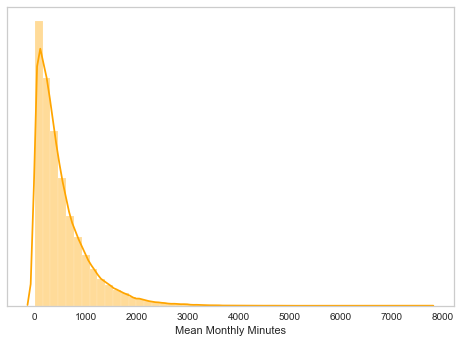

In [326]:
sns.set_style("whitegrid", {'axes.grid' : False})
h = sns.distplot(df.mou, color = 'orange')
h.set_yticklabels([])
plt.xlabel("Mean Monthly Minutes");

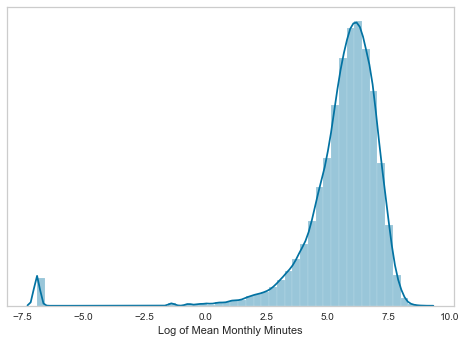

In [328]:
g = sns.distplot(df.log_mou, )
g.set_yticklabels([])
plt.xlabel("Log of Mean Monthly Minutes");

In [332]:
df.shape

(69309, 73)

In [333]:
X_test2.shape

(13862, 66)